In [7]:
import pandas as pd

crimes_orig = pd.read_csv('Crimes_-_2001_to_Present.csv')

crimes_orig

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,1930689,HH109118,01/05/2002 09:24:00 PM,007XX E 103 ST,0820,THEFT,$500 AND UNDER,GAS STATION,True,False,...,NaN,NaN,06,NaN,NaN,2002,02/04/2016 06:33:39 AM,NaN,NaN,NaN
2,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,NaN,NaN,2023,09/14/2023 03:43:09 PM,NaN,NaN,NaN
3,13210088,JG423627,08/31/2023 12:00:00 PM,023XX W JACKSON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,...,27.0,28.0,11,1160870.0,1898642.0,2023,09/16/2023 03:41:56 PM,41.877565,-87.684791,"(41.877565108, -87.68479102)"
4,13210004,JG422532,07/24/2023 09:45:00 PM,073XX S JEFFERY BLVD,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,7.0,43.0,02,1190812.0,1856743.0,2023,09/16/2023 03:41:56 PM,41.761919,-87.576209,"(41.7619185, -87.576209245)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7908438,13047495,JG229914,04/18/2023 08:00:00 AM,003XX N JEFFERSON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,42.0,28.0,11,1172269.0,1902384.0,2023,08/19/2023 03:40:26 PM,41.887589,-87.642827,"(41.887589411, -87.642826595)"
7908439,13168300,JG373901,08/07/2023 06:00:00 PM,0000X W 95TH ST,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,...,9.0,49.0,03,1177527.0,1841973.0,2023,08/19/2023 03:40:26 PM,41.721698,-87.625345,"(41.72169837, -87.625345212)"
7908440,13114024,JG309527,06/20/2023 07:00:00 PM,031XX S AVERS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,22.0,30.0,07,1151205.0,1883542.0,2023,08/19/2023 03:40:26 PM,41.836324,-87.720674,"(41.836323827, -87.720674149)"
7908441,13188860,JG398340,08/26/2023 12:00:00 AM,078XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,7.0,46.0,14,1198338.0,1853426.0,2023,09/02/2023 03:41:45 PM,41.752631,-87.548737,"(41.752631346, -87.548737069)"


# Limpieza de Datos y Análisis exploratorio

### Columnas y tipos de valores

In [8]:
# Comprobar las variables existentes en el dataset y sus características
crimes_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7908443 entries, 0 to 7908442
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

#### Descripción de las columnas


**ID**: identificador único del registro.

**Case Number**: corresponde al número de división de registros del Departamento de Policía de Chicago, el cual es exclusivo del incidente.

**Date**: fecha en la que ocurrió el incidente. A veces esta es la mejor estimación, según menciona la Policía de Chicago.

**Block**: la dirección parcialmente redactada donde ocurrió el incidente, ubicándola en el mismo bloque que la dirección real.

**IUCR**: El código uniforme de denuncia de delitos de Illinois. Esto está directamente relacionado con el tipo principal y la descripción. La policía de Chicago facilita el siguiente link para acceder a la lista de códigos IUCR: https://data.cityofchicago.org/d/c7ck-438e.

**Primary Type**: la descripción principal del código IUCR.

**Description**: la descripción secundaria del código IUCR, es una subcategoría de la descripción primaria.

**Location Description**: descripción de la ubicación donde ocurrió el incidente.

**Arrest**: indica si se realizó un arresto.

**Domestic**: indica si el incidente estuvo relacionado con el hogar según lo define la Ley de Violencia Doméstica de Illinois.

**Beat**: indica el Beat donde ocurrió el incidente. Un Beat (unidad de patrulla) es el área geográfica policial más pequeña: cada Beat tiene un vehículo policial exclusivo. De tres a cinco Beats conforman un sector policial y tres sectores conforman un distrito policial. El Departamento de Policía de Chicago tiene 22 distritos policiales. Aquí podrían verse los distintos Beats en la ciudad de Chgicado https://data.cityofchicago.org/d/aerh-rz74 .

**District**: indica el distrito policial donde ocurrió el incidente. Se pueden consultar en https://data.cityofchicago.org/d/fthy-xz3r .

**Ward**: el distrito (distrito del Ayuntamiento) donde ocurrió el incidente. Pueden verse en https://data.cityofchicago.org/d/sp34-6z76 .

**Community Area**: indica el área comunitaria donde ocurrió el incidente. Chicago tiene 77 áreas comunitarias. Se pueden consultar en https://data.cityofchicago.org/d/cauq-8yn6 .

**FBI Code**: indica la clasificación de delitos según lo descrito en el Sistema Nacional de Informes Basado en Incidentes del FBI.
**X Coordinate**: la coordenada X de la ubicación donde ocurrió el incidente en la proyección State Plane Illinois East NAD 1983. Esta ubicación se ha cambiado de la ubicación real para la redacción parcial, pero se encuentra en el mismo bloque.

**Y Coordinate**: la coordenada Y de la ubicación donde ocurrió el incidente en la proyección State Plane Illinois East NAD 1983. Esta ubicación se ha cambiado de la ubicación real para la redacción parcial, pero se encuentra en el mismo bloque.

**Year**: año en el que ocurrió el incidente.

**Updated On**: fecha y hora en que se actualizó el registro por última vez.

**Latitude**: la latitud del lugar donde ocurrió el incidente. Esta ubicación se ha cambiado de la ubicación real para la redacción parcial, pero se encuentra en el mismo bloque.

**Longitude**: la longitud del lugar donde ocurrió el incidente. Esta ubicación se ha cambiado de la ubicación real para la redacción parcial, pero se encuentra en el mismo bloque.

**Location**: la ubicación donde ocurrió el incidente en un formato que permite la creación de mapas y otras operaciones geográficas. Esta ubicación se ha cambiado de la ubicación real para la redacción parcial, pero se encuentra en el mismo bloque.

### Registros (o filas) a eliminar

  Para reducir el dataset y que su manipulación computacional sea más ágil, se conservarán solo los registros de los años 2018 al 2022. Ya se ha comprobado previamente la no existencia de valores nulos en la variable 'Year' para realizar una correcta eliminación de estos registros

In [9]:
# Filtrar los registros del 2018 al 2022
crimes_clean = crimes_orig.loc[(crimes_orig['Year'] >= 2018) & (crimes_orig['Year'] <= 2022)]

      Además solo se conservarán los registros que contengan el valor False en la columna "Domestic", ya que el trabajo se proyectará exclusivamente sobre las denuncias de los delitos cometidos fuera del ámbito doméstico o familiar. El dataset quedrá por el momento con 6549614 registros.

In [10]:
# Eliminación de los registros con el valor "True" en la columna "Domestic"
crimes_clean = crimes_clean[crimes_clean['Domestic'] == False]

# Eliminación de la columna "Domestic", ya no será necesaria ya en el dataset
crimes_clean = crimes_clean.drop('Domestic', axis=1)


### Variables (o columnas) a eliminar directamente

    'ID', 'Case Number', 'IUCR', 'FBI Code': son referencias o códigos policiales a nivel interno. No aporta información de interés o valor para el análisis ni para la creación del modelo de machine learning.
    
    'Block': aporta información sobre dónde ocurrió el incidente reportado. Podría haber sido una variable útil para asignar a los valores nulos registrados en la variable "Community Area" su verdadera area comunitaria cuando esta no sea posible a traves de las variables longitud y longitud por carecer estas también de datos (valores nulos). Se ha intentado hacer este procedimiento mediante la librería de Nominatim y así geolocalizar el area comunitaria, pero al poner la dirección, hay veces que designa el area comunitaria correcta y otras no. 
    
    'Updated On': corresponde a la ultima actualización de la denuncia, no influye en la búsqueda del proyecto.
    
    'Beat', 'District', 'Ward': son otro tipo de divisiones para la organización administrativa de la cidad de Chicago. En el trabajo se usará la división por "Community Area", al ser esta la de uso habitual por la ciudadanía (el equivalente en España sería "Barrio"), en total son 77.
    
    'Latitude', 'Longitude', 'X Coordinate', 'Y Coordinate', 'Location': finalmente no será necesaria ninguan de estas coordenadas. Se podría haber resuleto algunos valores nulos de la variable "Community Area", pero la librería Nomatim tiene restringida las llamadas y los valores nulos que tiene el dataset es de alrededor de 500.000 elementos, aún así solo se podría resolver alrededor de 35.000 valores nulos porque solo hay valores de coordeanadas para algunos registros que coinciden con los valores nulos de "Community Area".

In [11]:
# Lista de nombres de columnas a eliminar
columnas_a_eliminar = ['ID', 'Case Number', 'Block', 'IUCR', 'Beat', 'Updated On', 'District',
                       'Ward', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Location', 'Latitude', 'Longitude']

# Eliminar las columnas
crimes_clean = crimes_clean.drop(columnas_a_eliminar, axis=1)

### Sustitución del número de "Community Area" por su nombre real

In [12]:
crimes_clean['Community Area'].unique()

array([44., 69., 11., 68., 25., 45., 32., 60.,  4., 77., 71., 21., 23.,
       29., 66., 30., 28., 67., 75., 40.,  2., 31.,  7., 73., 61., 15.,
       49.,  8., 58., 56.,  3., 54., 41.,  5., 53., 26., 63., 65., 51.,
       19., 55., 47., 43., 27., 34., 37., 24., 20., 16., 35., 33., 22.,
       46.,  6., 10., 42., 14., 48., 70.,  1., 72., 39., 57., 38.,  9.,
       36., 74., 76., 50., 52., 17., 64., 18., 62., 13., 59., 12., nan])

##### Lista con la correspondencia del número con el nombre del area comunitaria

    "Community Area" 1: Rogers Park
    "Community Area" 2: West Ridge
    "Community Area" 3: Uptown
    "Community Area" 4: Lincoln Square
    "Community Area" 5: North Center
    "Community Area" 6: Lake View
    "Community Area" 7: Lincoln Park
    "Community Area" 8: Near North Side
    "Community Area" 9: Edison Park
    "Community Area" 10: Norwood Park
    "Community Area" 11: Jefferson Park
    "Community Area" 12: Forest Glen
    "Community Area" 13: North Park
    "Community Area" 14: Albany Park
    "Community Area" 15: Portage Park
    "Community Area" 16: Irving Park
    "Community Area" 17: Dunning
    "Community Area" 18: Montclare
    "Community Area" 19: Belmont Cragin
    "Community Area" 20: Hermosa
    "Community Area" 21: Avondale
    "Community Area" 22: Logan Square
    "Community Area" 23: Humboldt Park
    "Community Area" 24: West Town
    "Community Area" 25: Austin
    "Community Area" 26: West Garfield Park
    "Community Area" 27: East Garfield Park
    "Community Area" 28: Near West Side
    "Community Area" 29: North Lawndale
    "Community Area" 30: South Lawndale (Little Village)
    "Community Area" 31: Lower West Side (Pilsen)
    "Community Area" 32: Loop
    "Community Area" 33: Near South Side
    "Community Area" 34: Armour Square
    "Community Area" 35: Douglas
    "Community Area" 36: Oakland
    "Community Area" 37: Fuller Park
    "Community Area" 38: Grand Boulevard
    "Community Area" 39: Kenwood
    "Community Area" 40: Washington Park
    "Community Area" 41: Hyde Park
    "Community Area" 42: Woodlawn
    "Community Area" 43: South Shore
    "Community Area" 44: Chatham
    "Community Area" 45: Avalon Park
    "Community Area" 46: South Chicago
    "Community Area" 47: Burnside
    "Community Area" 48: Calumet Heights
    "Community Area" 49: Roseland
    "Community Area" 50: Pullman
    "Community Area" 51: South Deering
    "Community Area" 52: East Side
    "Community Area" 53: West Pullman
    "Community Area" 54: Riverdale
    "Community Area" 55: Hegewisch
    "Community Area" 56: Garfield Ridge
    "Community Area" 57: Archer Heights
    "Community Area" 58: Brighton Park
    "Community Area" 59: McKinley Park
    "Community Area" 60: Bridgeport
    "Community Area" 61: New City
    "Community Area" 62: West Elsdon
    "Community Area" 63: Gage Park
    "Community Area" 64: Clearing
    "Community Area" 65: West Lawn
    "Community Area" 66: Chicago Lawn
    "Community Area" 67: West Englewood
    "Community Area" 68: Englewood
    "Community Area" 69: Greater Grand Crossing
    "Community Area" 70: Ashburn
    "Community Area" 71: Auburn Gresham
    "Community Area" 72: Beverly
    "Community Area" 73: Washington Heights
    "Community Area" 74: Mount Greenwood
    "Community Area" 75: Morgan Park
    "Community Area" 76: O'Hare
    "Community Area" 77: Edgewater

In [13]:
# Diccionario con la realación de numero y nombre del area comunitaria
num_nombr_dicc = {1: 'Rogers Park', 2: 'West Ridge', 3: 'Uptown', 4: 'Lincoln Square', 5: 'North Center', 6: 'Lake View',
                  7: 'Lincoln Park', 8: 'Near North Side', 9: 'Edison Park', 10: 'Norwood Park', 11: 'Jefferson Park',
                  12: 'Forest Glen', 13: 'North Park', 14: 'Albany Park', 15: 'Portage Park', 16: 'Irving Park', 17: 'Dunning',
                  18: 'Montclare', 19: 'Belmont Cragin', 20: 'Hermosa', 21: 'Avondale', 22: 'Logan Square', 23: 'Humboldt Park',
                  24: 'West Town', 25: 'Austin', 26: 'West Garfield Park', 27: 'East Garfield Park', 28: 'Near West Side',
                  29: 'North Lawndale', 30: 'South Lawndale (Little Village)', 31: 'Lower West Side (Pilsen)', 32: 'Loop',
                  33: 'Near South Side', 34: 'Armour Square', 35: 'Douglas', 36: 'Oakland', 37: 'Fuller Park', 38: 'Grand Boulevard',
                  39: 'Kenwood', 40: 'Washington Park', 41: 'Hyde Park', 42: 'Woodlawn', 43: 'South Shore', 44: 'Chatham',
                  45: 'Avalon Park', 46: 'South Chicago', 47: 'Burnside', 48: 'Calumet Heights', 49: 'Roseland', 50: 'Pullman',
                  51: 'South Deering', 52: 'East Side', 53: 'West Pullman', 54: 'Riverdale', 55: 'Hegewisch', 56: 'Garfield Ridge',
                  57: 'Archer Heights', 58: 'Brighton Park', 59: 'McKinley Park', 60: 'Bridgeport', 61: 'New City', 62: 'West Elsdon',
                  63: 'Gage Park', 64: 'Clearing', 65: 'West Lawn', 66: 'Chicago Lawn', 67: 'West Englewood', 68: 'Englewood',
                  69: 'Greater Grand Crossing', 70: 'Ashburn', 71: 'Auburn Gresham', 72: 'Beverly', 73: 'Washington Heights',
                  74: 'Mount Greenwood', 75: 'Morgan Park', 76: "O'Hare", 77: 'Edgewater'}

# Aplica el mapeo
crimes_clean['Community Area'] = crimes_clean['Community Area'].map(num_nombr_dicc)

### Organizar la variable "Date" en diversas columnas para una mejor manipulación: "Day", "Day of  Month"  y "Month"

In [14]:
import pandas as pd

# Convertir la columna "Date" a tipo datetime
crimes_clean['Date'] = pd.to_datetime(crimes_clean['Date'])

# Crear una nueva columna 'Hour' con la hora (0-23)
crimes_clean['Hour'] = crimes_clean['Date'].dt.hour

# Crear una nueva columna 'Day' con el día de la semana (Monday, Tuesday, ...)
crimes_clean['Day'] = crimes_clean['Date'].dt.strftime('%A')

# Crear una nueva columna 'Day of Month' con el día dentro del mes
crimes_clean['Day of Month'] = crimes_clean['Date'].dt.day

# Crear una nueva columna 'Month' con el mes del año (January, March, ...)
crimes_clean['Month'] = crimes_clean['Date'].dt.strftime('%B')

# Eliminar 'Date' del dataframe
crimes_clean = crimes_clean.drop(['Date'], axis=1)


#### Establecer 4 franjas horarias para una mejor manipulación: "Morning", "Afternoon", "Evening" y "Night"

In [15]:
# Función para determinar la franja horaria
def franja (hora):
    if hora >= 6 and hora < 12:
        return "Morning"
    elif hora >= 12 and hora < 18:
        return "Afternoon"
    elif hora >= 18 and hora <=23:
        return "Evening"
    else:
        return "Night"

# Crear la columna "Time Period" aplicando la función
crimes_clean['Time Period'] = crimes_clean['Hour'].apply(franja)

### Añadir nuevas variables a partir de otros dataset: "Wheather Conditions" e "Income/Capita"

#### "Wheather Conditions" 

In [16]:
# Importar dataset desde donde se extraerá la información meteorológica
clima=pd.read_csv('POWER_Point_Daily_20180101_20221231_041d89N_087d66W_LST.csv')
clima

,YEAR,MO,DY,T2M,PRECTOTCORR,WS10M
0,2018,1,1,-13.71,0.01,7.35
1,2018,1,2,-13.45,0.00,8.73
2,2018,1,3,-8.38,0.23,8.28
3,2018,1,4,-9.65,0.34,7.82
4,2018,1,5,-10.53,0.19,7.31
...,...,...,...,...,...,...
1821,2022,12,27,-5.26,0.02,8.74
1822,2022,12,28,2.26,0.00,11.59
1823,2022,12,29,7.54,0.09,10.35
1824,2022,12,30,4.24,0.09,5.13


Descripción de las variables de este dataset (clima):

    'Year': año
    'MO': mes
    'DY': día del mes
    'T2M': tenperatura a dos mestros del suelo
    'PRECTOTCORR': precipitación caída en milímetros
    'WS10MM': velocidad del viento en metros por segundo

Se clasificarán las condiciones climáticas en extremas, adversas y agradables y se añadirá la variable "Weather Condotions" con su respectiva clasificación para cada fila o registro.

In [17]:
clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         1826 non-null   int64  
 1   MO           1826 non-null   int64  
 2   DY           1826 non-null   int64  
 3   T2M          1826 non-null   float64
 4   PRECTOTCORR  1826 non-null   float64
 5   WS10M        1826 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 85.7 KB


In [18]:
# Cambiar las variables tipo numérico para juntar los valores al dataframe 

# Diccionarios para mapear valores numéricos a nombres reales
meses = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Aplicar la sustitución en las columnas 'MO' y 'DY'
clima['MO'] = clima['MO'].replace(meses)


In [19]:
# Definir los criterios de clasificación
def clasificar_clima(i):
    if (i['T2M'] <= -5) or (i['T2M'] >= 40) or (i['PRECTOTCORR'] >= 20) or (i['WS10M'] >= 20):
        return "Extreme"
    elif (i['T2M'] <= 10 or i['T2M'] >= 30) or (i['PRECTOTCORR'] >= 7) or (i['WS10M'] >= 10):
        return "Adverse"
    else:
        return "Pleasant"

# Aplicar la función de clasificación a cada fila del DataFrame
clima['Weather Conditions'] = clima.apply(clasificar_clima, axis=1)

# El DataFrame ahora contiene una nueva columna llamada 'Classification' con las categorías correspondientes
clima

,YEAR,MO,DY,T2M,PRECTOTCORR,WS10M,Weather Conditions
0,2018,January,1,-13.71,0.01,7.35,Extreme
1,2018,January,2,-13.45,0.00,8.73,Extreme
2,2018,January,3,-8.38,0.23,8.28,Extreme
3,2018,January,4,-9.65,0.34,7.82,Extreme
4,2018,January,5,-10.53,0.19,7.31,Extreme
...,...,...,...,...,...,...,...
1821,2022,December,27,-5.26,0.02,8.74,Extreme
1822,2022,December,28,2.26,0.00,11.59,Adverse
1823,2022,December,29,7.54,0.09,10.35,Adverse
1824,2022,December,30,4.24,0.09,5.13,Adverse


In [20]:
clima

,YEAR,MO,DY,T2M,PRECTOTCORR,WS10M,Weather Conditions
0,2018,January,1,-13.71,0.01,7.35,Extreme
1,2018,January,2,-13.45,0.00,8.73,Extreme
2,2018,January,3,-8.38,0.23,8.28,Extreme
3,2018,January,4,-9.65,0.34,7.82,Extreme
4,2018,January,5,-10.53,0.19,7.31,Extreme
...,...,...,...,...,...,...,...
1821,2022,December,27,-5.26,0.02,8.74,Extreme
1822,2022,December,28,2.26,0.00,11.59,Adverse
1823,2022,December,29,7.54,0.09,10.35,Adverse
1824,2022,December,30,4.24,0.09,5.13,Adverse


In [21]:
# Realizar la fusión (merge) de las columnas "Year", "Month" y "Day of Month"
crimes_clean = crimes_clean.merge(clima[['YEAR', 'MO', 'DY', 'Weather Conditions']], left_on=['Year', 'Month', 'Day of Month'], right_on=['YEAR', 'MO', 'DY'], how='left')

# Eliminar las columnas adicionales ('YEAR', 'MO', 'DY')
crimes_clean = crimes_clean.drop(['YEAR', 'MO', 'DY'], axis=1)

#### "Income/Capita"

In [24]:
# Importar dataset desde donde se extraerá la información de la renta per cápita
per_capita=pd.read_csv('Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012_20231017.csv')
per_capita

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0


In [25]:
# Eliminar la renta per cápita media de toda la ciudad de Chicago para que coincida con los 77 barrios reales
per_capita = per_capita.drop(per_capita[per_capita['COMMUNITY AREA NAME'] == 'CHICAGO'].index)

Descripción breve del dataset:


El dataset contiene diversos indicadores socioeconómicos por Community Areas desde el año 2008 hasta el 2012, pero el que resulta de ultilidad con respecto al estudio o proyecto de machine lerarning es el que hace referencia a la media de la renta per cápita. Se extraerá esta variable y se adjuntará al dataframe sobre el que se está trabajando.

In [26]:
# Renombrar la variable 'PER CAPITA INCOME ' por 'Income/Capita' y así elimiar también los espacios existentes
per_capita = per_capita.rename(columns={'PER CAPITA INCOME ': 'Income/Capita'})

Antes de importar 'Income/Capita' al dataframe crimes_clean en función de la variable 'Community Area' de esta y 'COMMUNITY AREA NAME' del dataframe per_capita, se comprobará si todos los valores son coincidentes, de los contrario se procederá a su modificación y ajuste para que sí lo sea.

In [27]:
# Encuentra los valores que están en 'COMMUNITY AREA NAME' de per_capita pero no en 'Community Area' de crimes_clean
diferencias_list = list(set(per_capita['COMMUNITY AREA NAME']) - set(crimes_clean['Community Area']))

# Imprime los valores que no coinciden
print("Valores que no coinciden entre las dos columnas:")
diferencias_list


Valores que no coinciden entre las dos columnas:


['Lower West Side',
 'Humboldt park',
 'Montclaire',
 'South Lawndale',
 'Washington Height']

In [28]:
# Encuentra los valores que están en 'Community Area' de crimes_clean pero no en 'COMMUNITY AREA NAME' de per_capita
diferencias_list2 = list(set(crimes_clean['Community Area']) - set(per_capita['COMMUNITY AREA NAME']))

# Imprime los valores que no coinciden
print("Valores que no coinciden entre las dos columnas:")
diferencias_list2


Valores que no coinciden entre las dos columnas:


['Lower West Side (Pilsen)',
 'South Lawndale (Little Village)',
 'Washington Heights',
 'Montclare',
 nan,
 'Humboldt Park']

In [29]:
# Crear un diccionario que mapee los valores de 'per_capita' a los nuevos valores de 'crimes_clean'
map = {'Washington Height': 'Washington Heights',
       'South Lawndale': 'South Lawndale (Little Village)',
       'Lower West Side': 'Lower West Side (Pilsen)',
       'Humboldt park': 'Humboldt Park',
       'CHICAGO': 'nan',
       'Montclaire': 'Montclare'}

# Reemplazar los valores en la columna 'COMMUNITY AREA NAME' con los nuevos valores, los del dataframe 'crimes_clean'
per_capita['COMMUNITY AREA NAME'] = per_capita['COMMUNITY AREA NAME'].replace(map)

También se clasificará la renta per cápita en cuatro grupos segun la riqueza de cada Area Comunitaria (barrio) en función de su riqueza económica

In [35]:

per_capita['Income/Capita'].unique()

array([23939, 23040, 35787, 37524, 57123, 60058, 71551, 88669, 40959,
       32875, 27751, 44164, 26576, 21323, 24336, 27249, 26282, 22014,
       15461, 15089, 20039, 31908, 13781, 43198, 15957, 10934, 12961,
       44689, 12034, 10402, 16444, 65526, 59077, 16148, 23791, 19252,
       10432, 23472, 35911, 13785, 39056, 18672, 19398, 18881, 24454,
       16579, 12515, 28887, 17949, 20588, 14685, 17104, 16563,  8201,
       22677, 26353, 16134, 13089, 16954, 22694, 12765, 15754, 12171,
       25113, 16907, 13231, 11317, 11888, 17285, 23482, 15528, 39523,
       19713, 34381, 27149, 25828, 33385], dtype=int64)

In [36]:
#Lista de las 77 rentas percapita existentes para cada uno de los 77 barrios
renta_per_capita = [23939, 23040, 35787, 37524, 57123, 60058, 71551, 88669, 40959,
       32875, 27751, 44164, 26576, 21323, 24336, 27249, 26282, 22014,
       15461, 15089, 20039, 31908, 13781, 43198, 15957, 10934, 12961,
       44689, 12034, 10402, 16444, 65526, 59077, 16148, 23791, 19252,
       10432, 23472, 35911, 13785, 39056, 18672, 19398, 18881, 24454,
       16579, 12515, 28887, 17949, 20588, 14685, 17104, 16563,  8201,
       22677, 26353, 16134, 13089, 16954, 22694, 12765, 15754, 12171,
       25113, 16907, 13231, 11317, 11888, 17285, 23482, 15528, 39523,
       19713, 34381, 27149, 25828, 33385]

# Calcular la media de las rentas per cápita
media_renta_per_capita = sum(renta_per_capita) / len(renta_per_capita)

# Definir los límites de los grupos
limites_grupos = [0, media_renta_per_capita, 2 * media_renta_per_capita, max(renta_per_capita)]

# Nombres de los grupos
nombres_grupos = ["Low", "Moderate", "High"]

# Clasificar los ingresos y crea una nueva columna 'Income/Capita'
per_capita['Income/Capita'] = pd.cut(renta_per_capita, bins=limites_grupos, labels=nombres_grupos, include_lowest=True)


In [37]:
# Realiza una unión para agregar la columna 'Weather Conditions' a 'crimes_clean' en función de las fechas coincidentes
crimes_clean = crimes_clean.merge(per_capita[['COMMUNITY AREA NAME', 'Income/Capita']],
                                  left_on=['Community Area'], right_on=['COMMUNITY AREA NAME'],
                                  how='left') # 'how=left' mantendrá todas las filas en 'crimes_clean' y solo agregará
                                              #las coincidencias de la variable 'Weather Conditions' de 'per_capita'.

# Eliminar la columna 'COMMUNITY AREA NAME'
crimes_clean = crimes_clean.drop(['COMMUNITY AREA NAME'], axis=1)

### Agrupación en tres categorías los tipos de delidos en "Primary Type"

Esta clasificación se basa según la descripción para cada categoría de delitos y su naturaleza. Los delitos violentos  (y violentos extremos) involucran violencia física o amenazas de violencia, los delitos contra la propiedad involucran daños o robo de propiedad, y la categoría "Otros" incluye delitos que no se ajustan claramente en las categorías anteriores o que no son violentos ni contra la propiedad y no serán útiles para con el fin del trabajo realizado en este proyecto, por ende, serán eliminados.




**Delitos Violentos** (5):

    'ASSAULT': Este delito implica la amenaza o el uso de la fuerza contra una persona.
    'ROBBERY': Implica el uso de la fuerza o la amenaza de violencia para cometer un robo.
    'BATTERY': Implica el uso de la fuerza o la violencia contra otra persona.
    'INTIMIDATION': Este delito involucra amenazas de violencia.
    'SEX OFFENSE': Se considera violento, ya que incluye delitos sexuales que afectan la integridad de la víctima.

  
**Delitos Violentos extremos** (5)

    'CRIMINAL SEXUAL ASSAULT': Involucra agresiones sexuales violentas.
    'HOMICIDE': Se considera violento por atentar contra la vida de las personas.
    'KIDNAPPING': Involucra retención y privación ilegal de la libertad de una persona.        
    'CRIM SEXUAL ASSAULT': Involucra agresiones sexuales violentas.
    'HUMAN TRAFFICKING': Este delito es violento ya que involucra el secuestro y la explotación de personas.
    
    
**Delitos contra la Propiedad** (6):

    'THEFT': Este delito implica el robo de propiedad sin violencia.
    'CRIMINAL DAMAGE': Incluye daños intencionales a la propiedad.
    'BURGLARY': Implica la entrada ilegal a propiedades con la intención de cometer delitos.
    'MOTOR VEHICLE THEFT': El robo de vehículos se clasifica como un delito contra la propiedad.
    'ARSON': La destrucción maliciosa de la propiedad a través del fuego se clasifica como un delito contra la propiedad.
    'DECEPTIVE PRACTICE': Involucra engaño o fraude en perjuicio de la propiedad.  
    

**Otros. Se eliminarán del dataframe** (19):

    'WEAPONS VIOLATION': Este delito implica la posesión ilegal de armas de fuego u otros objetos peligrosos, que no se clasifica estrictamente como violento ni contra la propiedad.
    'STALKING': Aunque intrusivo, no es violento ni claramente un delito contra la propiedad.
    'OTHER OFFENSE': Un grupo amplio que no se clasifica claramente en las categorías anteriores.
    'PROSTITUTION': Aunque es un delito, no involucra violencia ni daño a la propiedad.
    'CRIMINAL TRESPASS': Implica la entrada ilegal a propiedades, pero no es violento ni claramente un delito contra la propiedad.
    'NARCOTICS': Implica delitos relacionados con drogas, pero no se ajusta a las categorías anteriores.
    'CONCEALED CARRY LICENSE VIOLATION': Relacionado con armas, pero no necesariamente violento o contra la propiedad.
    'INTERFERENCE WITH PUBLIC OFFICER': No es claramente violento ni un delito contra la propiedad.
    'PUBLIC PEACE VIOLATION': Delitos relacionados con disturbios públicos, pero no necesariamente violentos.
    'OFFENSE INVOLVING CHILDREN': Delitos relacionados con menores, pero no necesariamente violentos.
    'LIQUOR LAW VIOLATION': Delitos relacionados con leyes de bebidas alcohólicas, pero no necesariamente violentos.
    'GAMBLING': Delitos relacionados con apuestas o juegos de azar, no es violento ni contra la propiedad.
    'OBSCENITY': Delitos relacionados con contenido obsceno, no violentos ni contra la propiedad.
    'RITUALISM': Un término poco claro en el contexto de los delitos.
    'OTHER NARCOTIC VIOLATION': Delitos relacionados con narcóticos que no son violentos ni contra la propiedad.
    'PUBLIC INDECENCY': Delitos indecentes que no son violentos ni contra la propiedad.
    'NON-CRIMINAL': No implica actividad criminal.
    'NON-CRIMINAL (SUBJECT SPECIFIED)': No se trata de un delito.
    'NON - CRIMINAL': No se trata de un delito.

In [45]:
# Eliminar los 'Primary Types' que nos serán necesarios en el conjunto de datos
valores_a_eliminar_prim = ['WEAPONS VIOLATION', 'STALKING', 'OTHER OFFENSE', 'PROSTITUTION', 'CRIMINAL TRESPASS', 'NARCOTICS',
                      'CONCEALED CARRY LICENSE VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE VIOLATION',
                      'OFFENSE INVOLVING CHILDREN', 'LIQUOR LAW VIOLATION', 'GAMBLING', 'OBSCENITY', 'RITUALISM',
                      'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
                      'NON - CRIMINAL']
crimes_clean = crimes_clean[~crimes_clean['Primary Type'].isin(valores_a_eliminar_prim)]


#### Agrupación de los diferentes tipos de delitos contenidos en la columna "Primary Type" según descripción anterior

In [46]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df.
extreme_violence = ['CRIMINAL SEXUAL ASSAULT', 'HOMICIDE', 'KIDNAPPING', 'CRIM SEXUAL ASSAULT', 'HUMAN TRAFFICKING']
violent_crimes = ['ASSAULT', 'ROBBERY', 'BATTERY', 'INTIMIDATION', 'SEX OFFENSE']
property_crimes = ['THEFT', 'CRIMINAL DAMAGE', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ARSON', 'DECEPTIVE PRACTICE']

crimes_clean = crimes_clean.copy() #Así podrá evitarse la advertencia por intentar modificar una vista de un DataFrame en lugar 
                                    #del DataFrame original

# Utiliza la función replace para reemplazar los valores en la columna "Primary Type".
crimes_clean['Primary Type'].replace(extreme_violence, 'Extreme violence', inplace=True)
crimes_clean['Primary Type'].replace(violent_crimes, 'Violent crimes', inplace=True)
crimes_clean['Primary Type'].replace(property_crimes, 'Property crimes', inplace=True)


### Eliminar los valores con tipos de delitos no cometidos en el ámbito doméstico o en un apartamento, casa, domicilio o similar. El proyecto se basa en delitos cometidos fuera de este ámbito.

#### Eliminar de la columna 'Location Description' los delitos que aún podría considerarse dentro de un domicilio, ya que en el trabajo no se tratarán los delitos cometidos dentro de un domicilio, residencia o similar, así como tampoco los del ámbito doméstico. Tras darle este uso a la variable, se eliminará. La mayoría de las denuncias de delitos, según 'Location Description', se producen en la calle, en la acera o lugares de uso público donde los ciudadanos circulan. Todo el dataframe está enfocado a este ámbito, por lo que ya no será util esta variable.

In [48]:
# Comprobar los delitos existentes en esta columna para decartar los mencionados anteriormente
crimes_clean['Location Description'].unique()

array(['RESIDENCE', 'APARTMENT', 'CAR WASH',
       'COMMERCIAL / BUSINESS OFFICE', 'BAR OR TAVERN', 'OTHER',
       'PARKING LOT / GARAGE (NON RESIDENTIAL)',
       'SCHOOL - PUBLIC GROUNDS', 'STREET', 'WAREHOUSE',
       'OTHER (SPECIFY)', 'HOSPITAL BUILDING / GROUNDS', nan, 'SIDEWALK',
       'NURSING / RETIREMENT HOME', 'BANK', 'HOTEL / MOTEL', 'ALLEY',
       'MOVIE HOUSE / THEATER', 'CHA APARTMENT',
       'OTHER RAILROAD PROPERTY / TRAIN DEPOT', 'VEHICLE NON-COMMERCIAL',
       'SCHOOL - PUBLIC BUILDING', 'APPLIANCE STORE', 'GAS STATION',
       'DEPARTMENT STORE',
       'VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)',
       'CTA TRAIN', 'RESIDENCE - GARAGE', 'CTA PLATFORM',
       'AUTO / BOAT / RV DEALERSHIP', 'PARK PROPERTY', 'RESTAURANT',
       'SMALL RETAIL STORE', 'CREDIT UNION',
       'RESIDENCE - YARD (FRONT / BACK)', 'CTA BUS', 'PARKING LOT',
       'VACANT LOT / LAND', 'GROCERY FOOD STORE', 'BARBERSHOP',
       'VEHICLE-COMMERCIAL', 'ATM (AUTOMATIC TELLER M

In [49]:
# Eliminar los 'Location Description' que nos serán necesarios en el conjunto de datos
valores_a_eliminar_descr = ['APARTMENT', 'RESIDENCE - GARAGE', 'RESIDENCE - PORCH / HALLWAY', 'RESIDENCE',
                            'RESIDENCE - YARD (FRONT / BACK)', 'HOUSE', 'CHA APARTMENT', 'DRIVEWAY - RESIDENTIAL',
                            'COLLEGE / UNIVERSITY - RESIDENCE HALL', 'RESIDENCE-GARAGE', 'RESIDENCE PORCH/HALLWAY',
                            'RESIDENTIAL YARD (FRONT/BACK)', 'COLLEGE/UNIVERSITY RESIDENCE HALL', 'ROOMING HOUSE', 'GARAGE',
                            'BASEMENT']

crimes_clean = crimes_clean[~crimes_clean['Location Description'].isin(valores_a_eliminar_descr)]

# Eliminar la columna 'Location Description'
crimes_clean = crimes_clean.drop(['Location Description'], axis=1)

### Nuevas columnas días festivos

In [51]:
from workalendar.usa import Illinois

# Crear una instancia del calendario de Estados Unidos
Il_cal = Illinois()


# Función para determinar si una fecha es un día festivo
def dia_festivo(fila):
    year = fila["Year"]
    month = fila["Month"]
    day = fila["Day of Month"]

    # Verificar si la fecha es un día festivo utilizando el calendario de Estados Unidos
    is_holiday = Il_cal.is_holiday(pd.Timestamp(f"{year}-{month}-{day}"))
    return is_holiday

# Aplicar la función para crear la columna "Holiday"
crimes_clean["Holiday"] = crimes_clean.apply(dia_festivo, axis=1)

#### Día previo a un festivo

In [52]:
# Función para determinar si una fecha es un día previo a un día festivo
def dia_previo_festivo(fila):
    year = fila["Year"]
    month = fila["Month"]
    day = fila["Day of Month"]

    # Verificar si la fecha anterior es un día festivo utilizando el calendario de Estados Unidos
    previous_date = pd.Timestamp(f"{year}-{month}-{day}") - pd.DateOffset(days=1)
    is_previous_holiday = Il_cal.is_holiday(previous_date)
    return is_previous_holiday

# Aplicar la función para crear la columna "Previous Holiday"
crimes_clean["Previous Holiday"] = crimes_clean.apply(dia_previo_festivo, axis=1)


### Eliminar valores Nulos

In [56]:
crimes_clean.isnull().sum()

Primary Type          0
Description           0
Arrest                0
Community Area        2
Year                  0
Hour                  0
Day                   0
Day of Month          0
Month                 0
Time Period           0
Weather Conditions    0
Income/Capita         2
Holiday               0
Previous Holiday      0
dtype: int64

In [57]:
# Comprobación de las filas con valores nulos
registros_nulos = crimes_clean[crimes_clean['Community Area'].isnull()]
registros_nulos

,Primary Type,Description,Arrest,Community Area,Year,Hour,Day,Day of Month,Month,Time Period,Weather Conditions,Income/Capita,Holiday,Previous Holiday
548614,Violent crimes,AGGRAVATED - HANDGUN,False,NaN,2020,15,Sunday,9,August,Afternoon,Pleasant,NaN,False,False
614803,Violent crimes,AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WE...,True,NaN,2020,13,Monday,14,December,Afternoon,Adverse,NaN,False,False


Las dos filas con los valores nulos se eliminarán directamente, no afectará lo más minimo al conjunto de datos

In [58]:
# Eliminar ragistros con valores nulos
crimes_clean = crimes_clean.dropna()

In [238]:
crimes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552458 entries, 0 to 552457
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Primary Type        552458 non-null  object
 1   Description         552458 non-null  object
 2   Arrest              552458 non-null  bool  
 3   Community Area      552458 non-null  object
 4   Year                552458 non-null  int64 
 5   Hour                552458 non-null  int64 
 6   Day                 552458 non-null  object
 7   Day of Month        552458 non-null  int64 
 8   Month               552458 non-null  object
 9   Time Period         552458 non-null  object
 10  Weather Conditions  552458 non-null  object
 11  Income/Capita       552458 non-null  object
 12  Holiday             552458 non-null  bool  
 13  Previous Holiday    552458 non-null  bool  
dtypes: bool(3), int64(3), object(8)
memory usage: 47.9+ MB


## Exploración gráfica de los datos

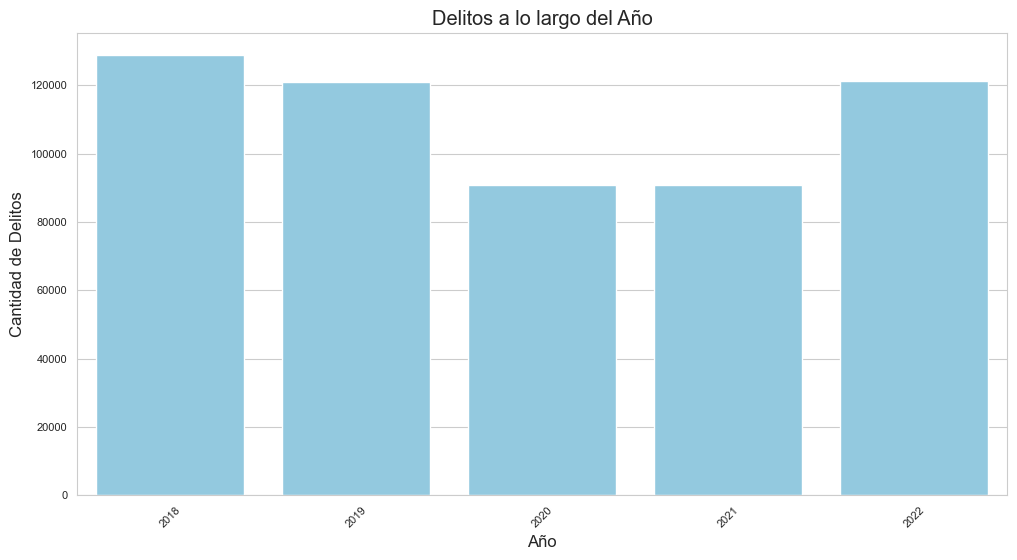

In [368]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la cantidad de delitos por año
crimes_by_year = crimes_clean['Year'].value_counts().reset_index()
crimes_by_year.columns = ['Year', 'Count']

# Crear un gráfico de barras de delitos a lo largo del año
plt.figure(figsize=(12, 6))
sns.barplot(data=crimes_by_year, x='Year', y='Count', color='skyblue')
plt.title('Delitos a lo largo del Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para una mejor legibilidad
plt.savefig('Delitos AÑ0o.png')
plt.show()


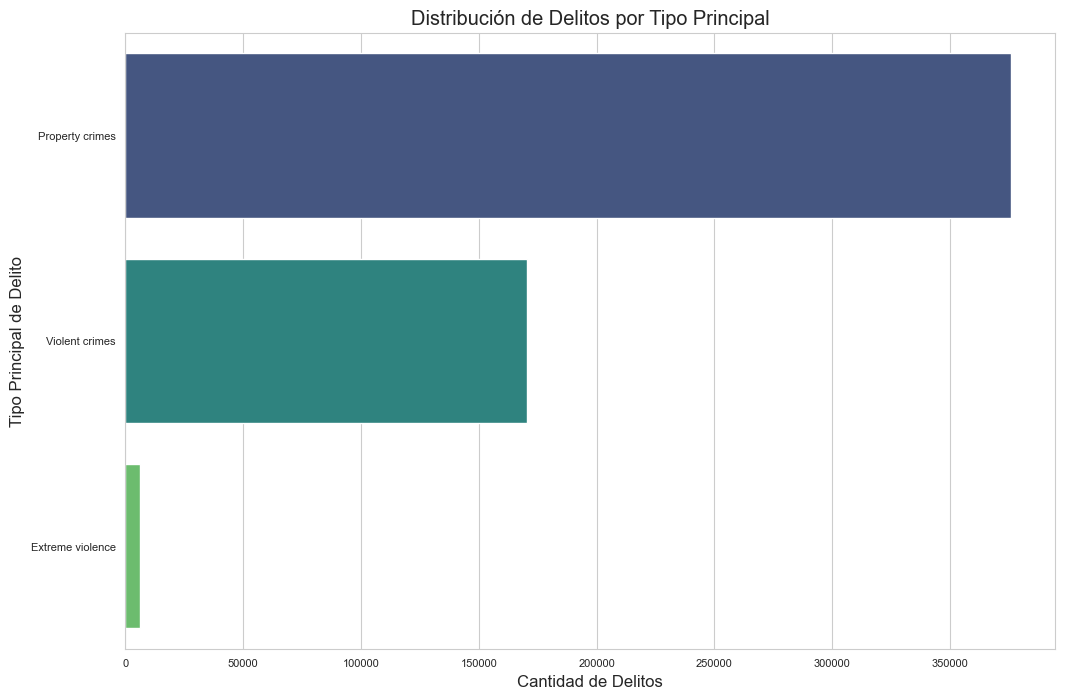

In [369]:
plt.figure(figsize=(12, 8))
sns.countplot(data=crimes_clean, y='Primary Type', order=crimes_clean['Primary Type'].value_counts().index, palette='viridis')
plt.title('Distribución de Delitos por Tipo Principal')
plt.xlabel('Cantidad de Delitos')
plt.ylabel('Tipo Principal de Delito')
plt.savefig('Tipo Principal de Delito.png')
plt.show()


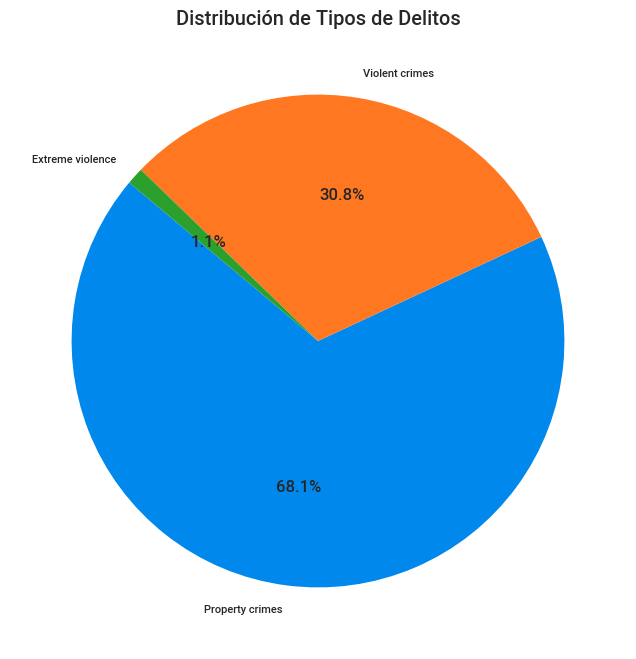

In [261]:
plt.figure(figsize=(8, 8))
plt.pie(crimes_clean['Primary Type'].value_counts(), labels=crimes_clean['Primary Type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Tipos de Delitos')
plt.show()


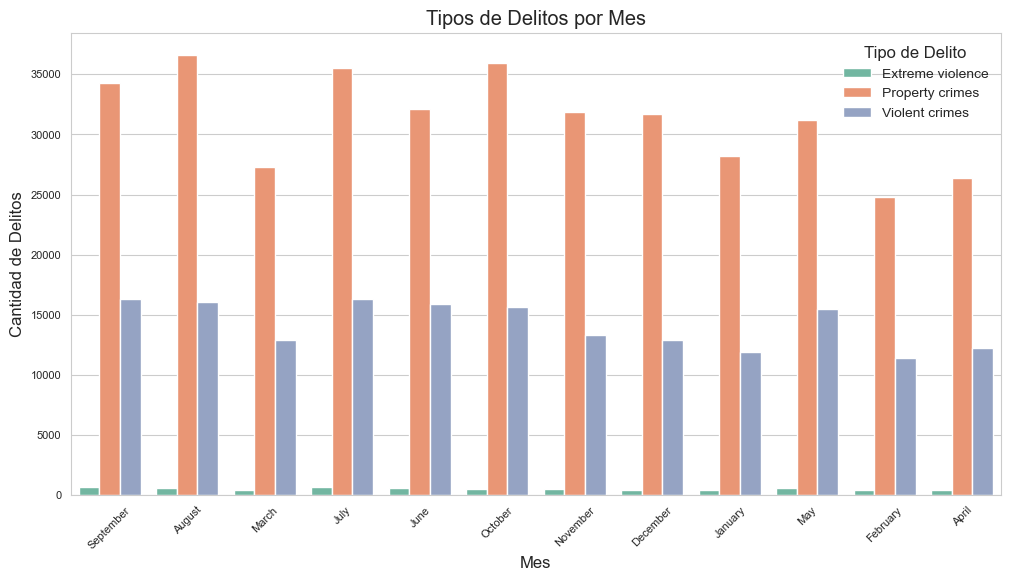

In [370]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de barras apiladas de tipo de delito por mes
plt.figure(figsize=(12, 6))
sns.countplot(data=crimes_clean, x='Month', hue='Primary Type', palette='Set2')
plt.title('Tipos de Delitos por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Delito')
plt.savefig('Tipos de Delitos por Mes.png')
plt.show()


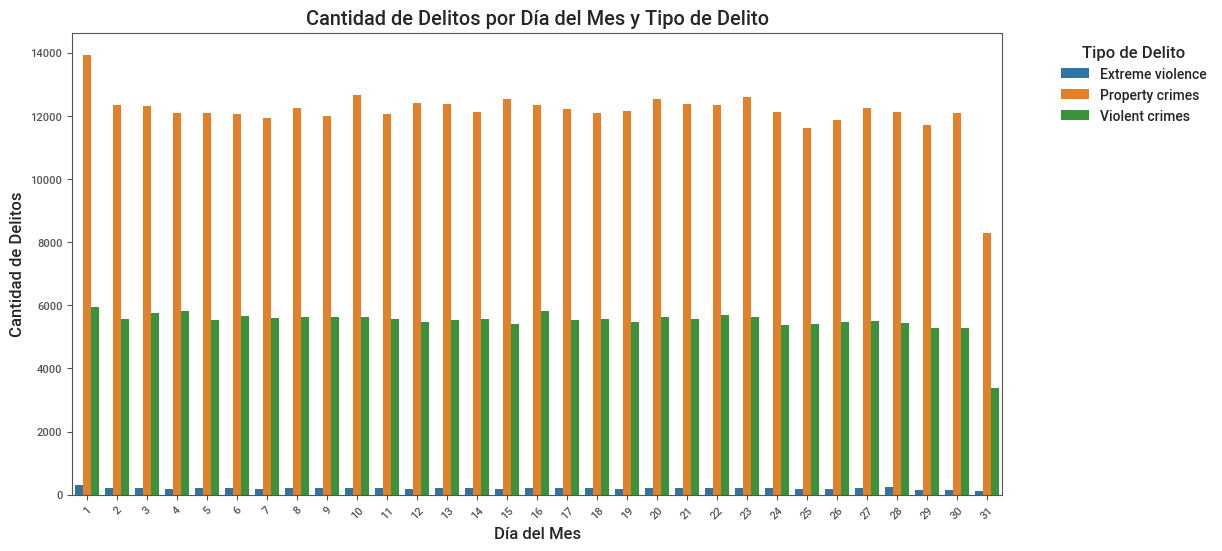

In [276]:
plt.figure(figsize=(12, 6))
sns.countplot(data=crimes_clean, x='Day of Month', hue='Primary Type', palette='tab10')
plt.title('Cantidad de Delitos por Día del Mes y Tipo de Delito')
plt.xlabel('Día del Mes')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Delito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


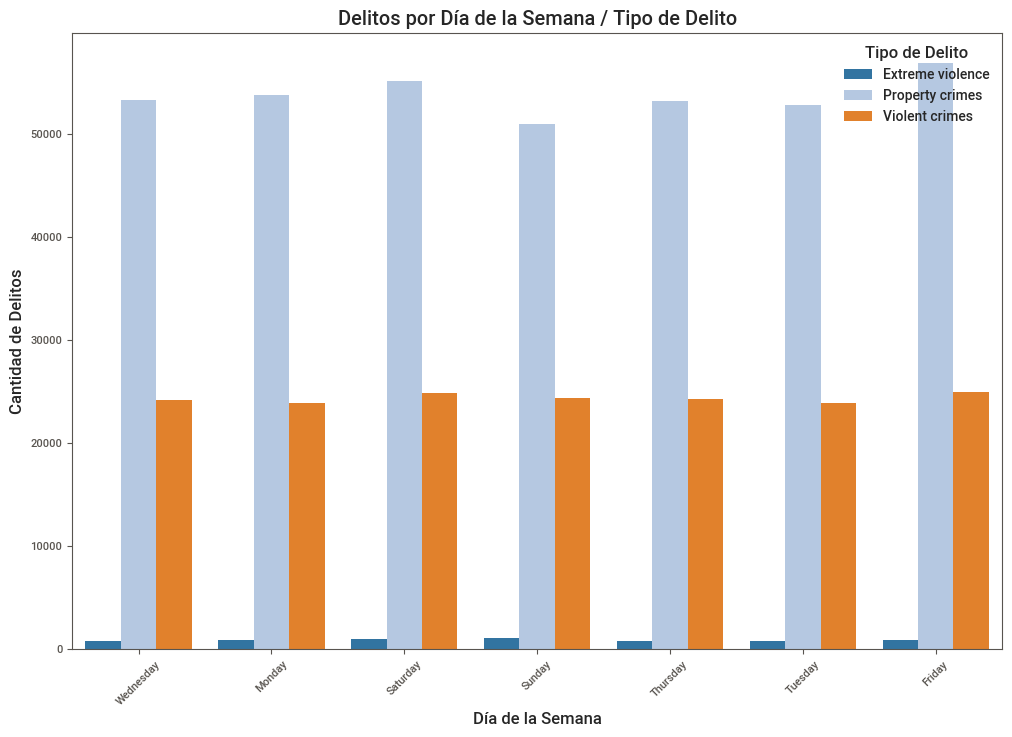

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de barras de delitos por día de la semana y divididos por 'Primary Type'
plt.figure(figsize=(12, 8))
sns.countplot(data=crimes_clean, x='Day', hue='Primary Type', palette='tab20')
plt.title('Delitos por Día de la Semana / Tipo de Delito')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Delito')
plt.show()



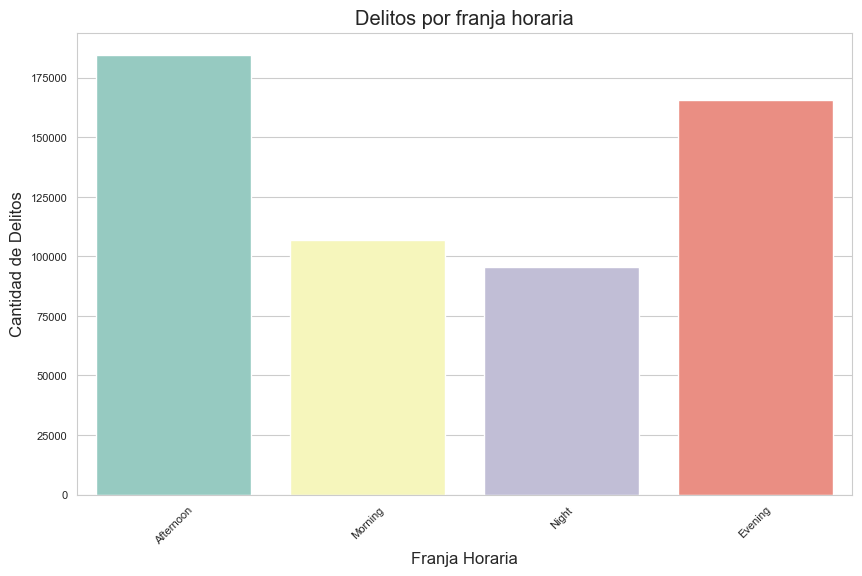

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de barras de delitos por día de la semana
plt.figure(figsize=(10, 6))
sns.countplot(data=crimes_clean, x='Time Period', palette='Set3')
plt.title('Delitos por franja horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.savefig('Delitos por franja horaria.png')
plt.show()


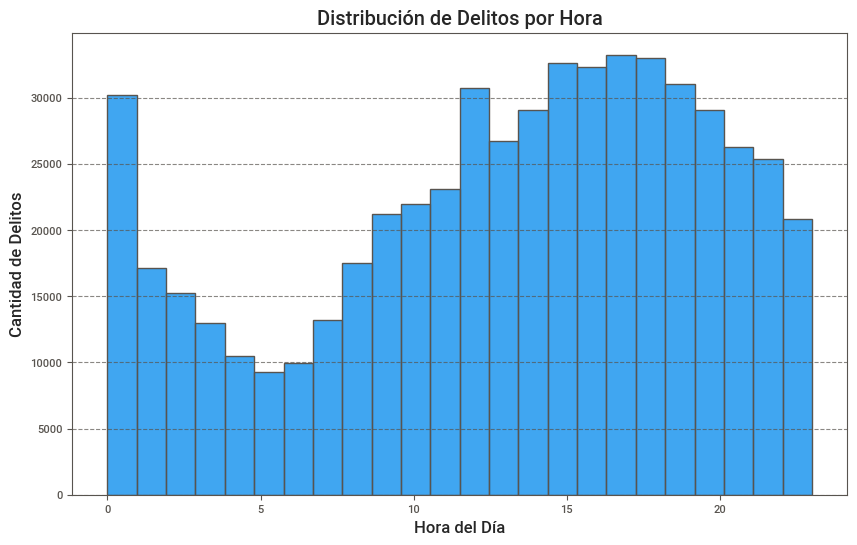

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un histograma de delitos por hora
plt.figure(figsize=(10, 6))
sns.histplot(data=crimes_clean, x='Hour', bins=24,)
plt.title('Distribución de Delitos por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Delitos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



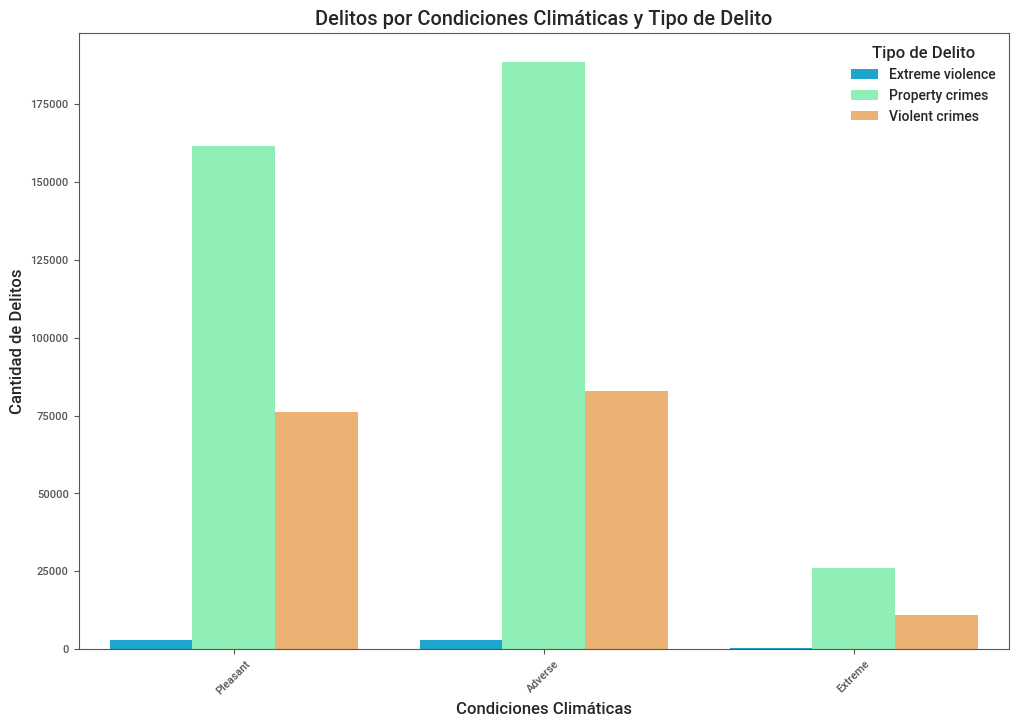

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de barras de delitos por 'Weather Conditions' y 'Primary Type'
plt.figure(figsize=(12, 8))
sns.countplot(data=crimes_clean, x='Weather Conditions', hue='Primary Type', palette='rainbow')
plt.title('Delitos por Condiciones Climáticas y Tipo de Delito')
plt.xlabel('Condiciones Climáticas')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Delito')
plt.show()



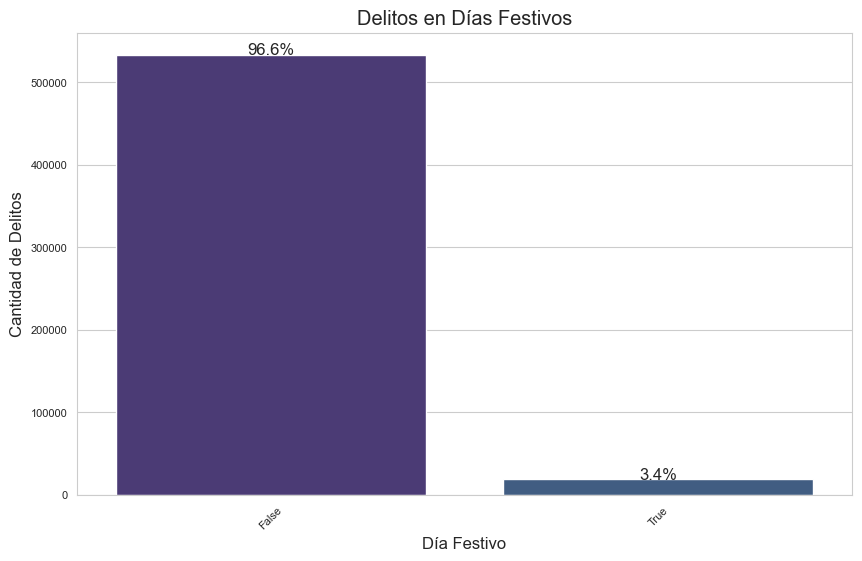

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de barras de delitos en días festivos con porcentaje
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Calcular el número de delitos para cada categoría de 'Holiday'
data = crimes_clean['Holiday'].value_counts().reset_index()

# Configurar colores
colors = sns.color_palette('viridis')[0:len(data)]

# Crear el gráfico de barras
ax = sns.barplot(data=data, x='index', y='Holiday', palette=colors)

# Anotar los porcentajes en las barras
total = len(crimes_clean)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{100 * height/total:.1f}%', (x + width/2, y + height), ha='center')

plt.title('Delitos en Días Festivos')
plt.xlabel('Día Festivo')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.show()


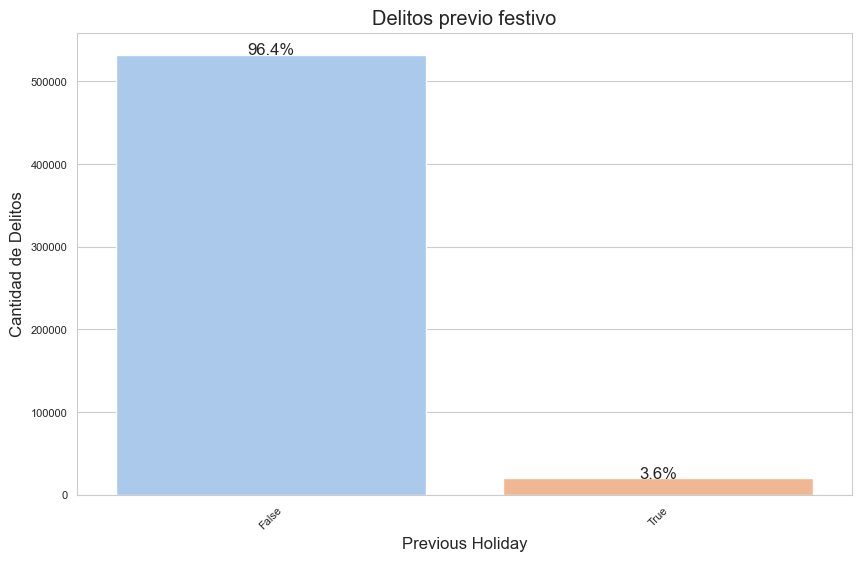

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de barras apiladas con porcentaje para 'Previous Holiday'
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Calcular el número de delitos para cada categoría de 'Previous Holiday'
data = crimes_clean['Previous Holiday'].value_counts().reset_index()

# Configurar colores
colors = sns.color_palette('pastel')[0:len(data)]

# Crear el gráfico de barras apiladas
ax = sns.barplot(data=data, x='index', y='Previous Holiday', palette=colors)

# Anotar los porcentajes en las barras
total = len(crimes_clean)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{100 * height/total:.1f}%', (x + width/2, y + height), ha='center')

plt.title('Delitos previo festivo')
plt.xlabel('Previous Holiday')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.show()


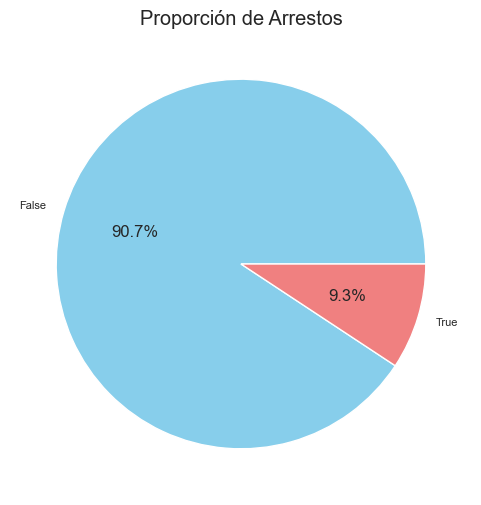

In [372]:
import matplotlib.pyplot as plt

# Crear un gráfico de donut de arrestos
arrest_counts = crimes_clean['Arrest'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(arrest_counts, labels=arrest_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Arrestos')
plt.savefig('Proporción Arresto.png')
plt.show()


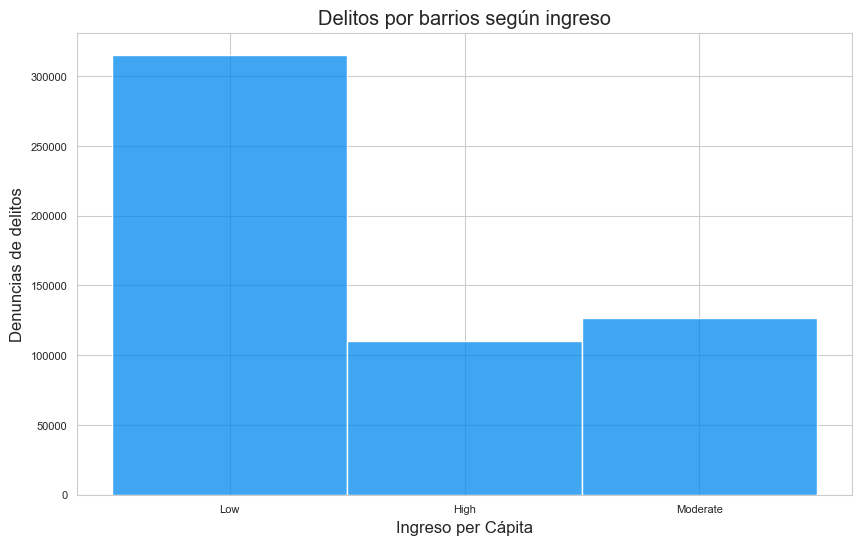

In [373]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un histograma de ingresos por cápita
plt.figure(figsize=(10, 6))
sns.histplot(data=crimes_clean, x='Income/Capita')
plt.title('Delitos por barrios según ingreso')
plt.xlabel('Ingreso per Cápita')
plt.ylabel('Denuncias de delitos')
plt.savefig('Delitos por barrios según ingreso.png')
plt.show()


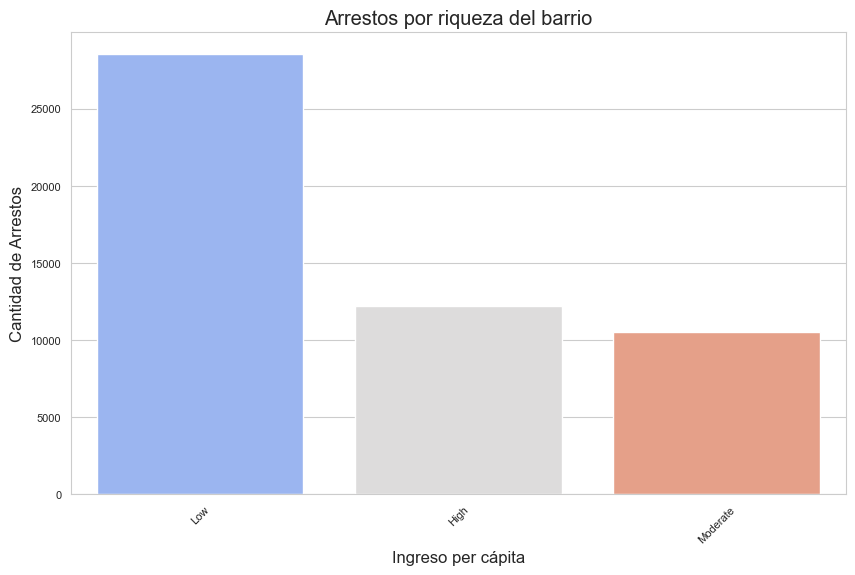

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de barras de arrestos por categoría de 'Income/Capita'
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Agrupar los datos por 'Income/Capita' y contar la cantidad de arrestos en cada categoría
arrests_by_income = crimes_clean[crimes_clean['Arrest'] == True]
arrests_by_income = arrests_by_income['Income/Capita'].value_counts().reset_index()

# Configurar los colores
colors = sns.color_palette('coolwarm', len(arrests_by_income))

# Crear el gráfico de barras
ax = sns.barplot(data=arrests_by_income, x='index', y='Income/Capita', palette=colors)

plt.title('Arrestos por riqueza del barrio')
plt.xlabel('Ingreso per cápita')
plt.ylabel('Cantidad de Arrestos')
plt.xticks(rotation=45)
plt.savefig('Arrestos por riqueza del barrio.png')
plt.show()


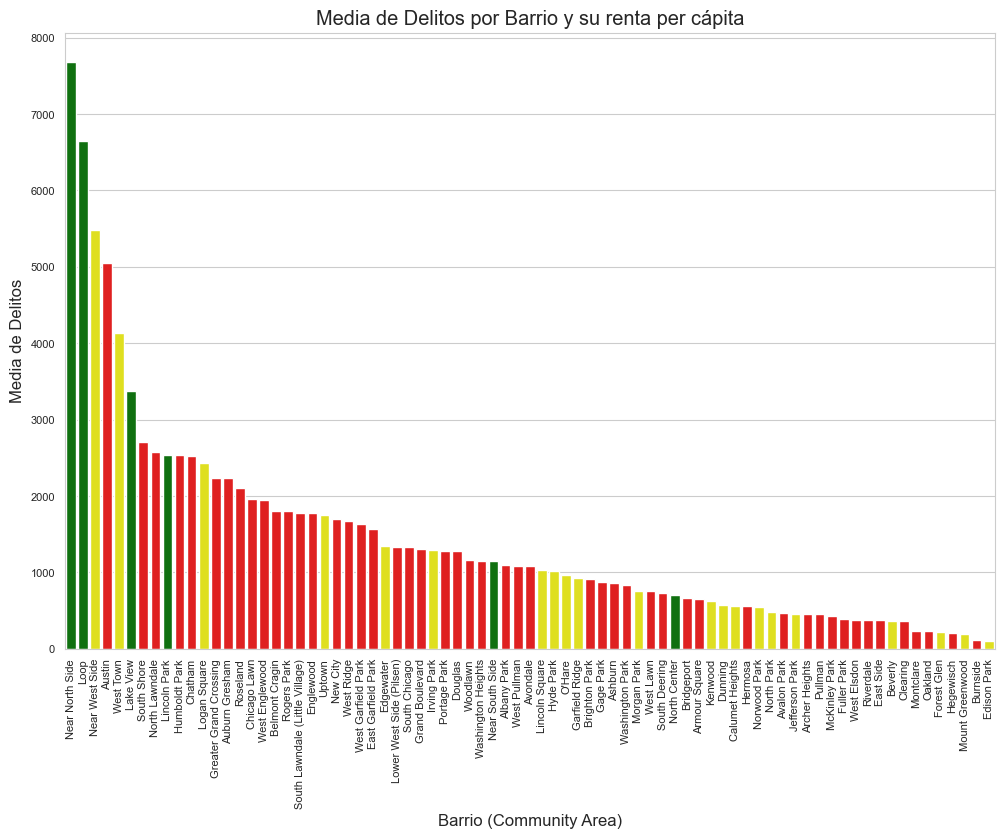

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupa los datos por 'Community Area' y 'Year' y calcula la cantidad total de delitos
crimes_by_community = crimes_clean.groupby(['Community Area', 'Year'])['Primary Type'].count().reset_index()

# Calcula la media de los delitos para cada barrio en todos los años
mean_crimes_by_community = crimes_by_community.groupby('Community Area')['Primary Type'].mean().reset_index()

# Agrega la variable 'Income/Capita' para cada barrio
mean_crimes_by_community['Income/Capita'] = crimes_clean.groupby('Community Area')['Income/Capita'].first().values

# Mapea los valores de 'Income/Capita' a colores
income_palette = {'Low': 'red', 'Moderate': 'yellow', 'High': 'green'}

# Ordena el DataFrame por la media de delitos de forma descendente
mean_crimes_by_community = mean_crimes_by_community.sort_values(by='Primary Type', ascending=False)

# Graficar la media de delitos por barrio con colores según 'Income/Capita'
plt.figure(figsize=(12, 8))
sns.barplot(data=mean_crimes_by_community, x='Community Area', y='Primary Type', palette=mean_crimes_by_community['Income/Capita'].map(income_palette))
plt.title('Media de Delitos por Barrio y su renta per cápita')
plt.xlabel('Barrio (Community Area)')
plt.ylabel('Media de Delitos')
plt.xticks(rotation=90)
plt.savefig('Media delitos.png')
plt.show()


# Procesamiento de datos

Se eliminarán las variables que han sido útiles para realizar un análisis gráfico, pero que no serán necesarias para aplicar los algoritmos de machine learning.

'Description': la descripción del tipo de delito ya está contenida en la variable 'Primary Type'. Esta última será la variable objetivo.

'Arrest': es un variable que no afecta al tipo de predicción. Que se acabe arrestando al sospechoso, no afecta a que el delito se haya cometido finalmente, y esto es lo que se busca en el proyecto.

'Income/Capita': está directamente relacionado con la variable 'Community Area' (barrio), cada barrio tiene un a renta per cápita determinada. Podría haberse incluido para el algoritmo y valorar si cuanto mayor sea el ingreso per cápita de un barrio tiene menos o más delitos, pero esto no es objeto de análisis para este proyecto de clasificación. De esta manera también se reduce la multocolinealidad.

In [390]:
# Guardar en otra instancia el dataframe para empezar a procesar los datos y distinguirlo
crimes_clean_proces = crimes_clean

In [378]:
# Eliminar variables no útiles para la predicción
crimes_clean_proces = crimes_clean_proces.drop(['Description', 'Arrest', 'Income/Capita', ], axis=1)

In [391]:
crimes_clean

,Primary Type,Description,Arrest,Community Area,Year,Hour,Day,Day of Month,Month,Time Period,Weather Conditions,Income/Capita,Holiday,Previous Holiday
0,Extreme violence,FIRST DEGREE MURDER,True,Austin,2021,16,Wednesday,8,September,Afternoon,Pleasant,Low,False,False
1,Property crimes,OVER $500,False,Loop,2022,9,Monday,15,August,Morning,Pleasant,High,False,False
2,Property crimes,FROM BUILDING,False,Lincoln Square,2019,11,Saturday,16,March,Morning,Adverse,Moderate,False,False
3,Property crimes,OVER $500,False,Edgewater,2019,1,Wednesday,20,March,Night,Adverse,Moderate,False,False
4,Property crimes,OVER $500,False,Chatham,2019,14,Sunday,21,July,Afternoon,Adverse,Low,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552453,Property crimes,AUTOMOBILE,False,Chatham,2021,0,Tuesday,5,October,Night,Pleasant,Low,False,False
552454,Property crimes,EMBEZZLEMENT,False,Uptown,2022,12,Monday,12,December,Afternoon,Adverse,Moderate,False,False
552455,Property crimes,FROM BUILDING,False,Jefferson Park,2022,0,Saturday,1,October,Night,Pleasant,Moderate,False,False
552456,Property crimes,FORGERY,False,Ashburn,2022,11,Tuesday,22,November,Morning,Adverse,Low,False,False


### Comprobar la influencia entre variables categóricas con el método Chi-cuadrado

In [379]:
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(crimes_clean_proces['Primary Type'], crimes_clean_proces['Weather Conditions'])
chi2, p, _, _ = chi2_contingency(tabla_contingencia)
if p < 0.05:
    print(f"Hay una asociación significativa. Valor p: {p}")
else:
    print(f"No hay una asociación significativa. Valor p: {p}")



Hay una asociación significativa. Valor p: 4.1446225692488753e-41


In [380]:
tabla_contingencia

Weather Conditions,Adverse,Extreme,Pleasant
Primary Type,,,
Extreme violence,2847,386,2929
Property crimes,188332,25953,161677
Violent crimes,82974,11092,76268


Finalmente no se elimina ninguna variable más, ya que después de aplicar el método Chi-cuadrado se observa una asociación considerable de las variables independientes con respecto a la dependiente

## Codificación de los datos para aplicarlos a los algoritmos

In [381]:
from sklearn.model_selection import train_test_split

# Lista de columnas categóricas independientes
categorical_columns = ['Community Area', 'Year', 'Day', 'Day of Month', 'Month', 'Time Period',
                       'Weather Conditions', 'Hour', 'Holiday', 'Previous Holiday']

# Aplicar get_dummies a las columnas independientes
crimes_clean_proces = pd.get_dummies(crimes_clean_proces, columns=categorical_columns)


### Reducción de dimensionalidad con PCA

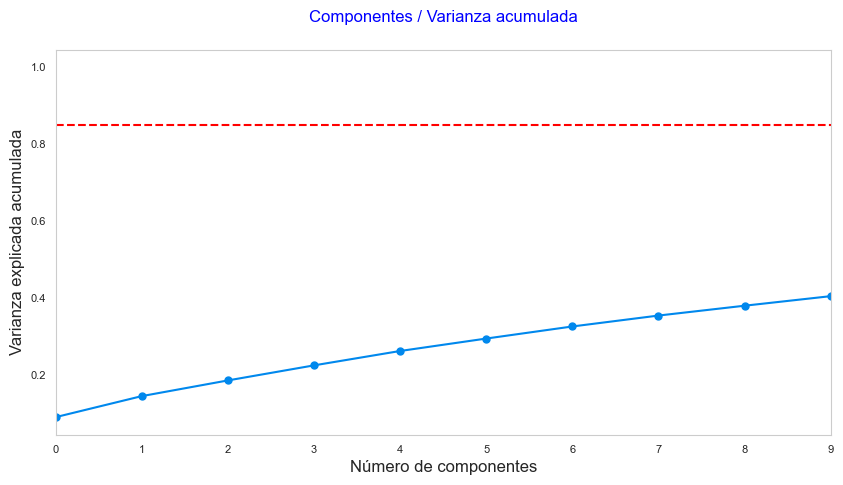

In [382]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


columns_interest = ['Community Area_Albany Park', 'Community Area_Archer Heights', 'Community Area_Armour Square', 'Community Area_Ashburn', 'Community Area_Auburn Gresham', 'Community Area_Austin', 'Community Area_Avalon Park', 'Community Area_Avondale', 'Community Area_Belmont Cragin', 'Community Area_Beverly', 'Community Area_Bridgeport', 'Community Area_Brighton Park', 'Community Area_Burnside', 'Community Area_Calumet Heights', 'Community Area_Chatham', 'Community Area_Chicago Lawn', 'Community Area_Clearing', 'Community Area_Douglas', 'Community Area_Dunning', 'Community Area_East Garfield Park', 'Community Area_East Side', 'Community Area_Edgewater', 'Community Area_Edison Park', 'Community Area_Englewood', 'Community Area_Forest Glen', 'Community Area_Fuller Park', 'Community Area_Gage Park', 'Community Area_Garfield Ridge', 'Community Area_Grand Boulevard', 'Community Area_Greater Grand Crossing', 'Community Area_Hegewisch', 'Community Area_Hermosa', 'Community Area_Humboldt Park', 'Community Area_Hyde Park', 'Community Area_Irving Park', 'Community Area_Jefferson Park', 'Community Area_Kenwood', 'Community Area_Lake View', 'Community Area_Lincoln Park', 'Community Area_Lincoln Square', 'Community Area_Logan Square', 'Community Area_Loop', 'Community Area_Lower West Side (Pilsen)', 'Community Area_McKinley Park', 'Community Area_Montclare', 'Community Area_Morgan Park', 'Community Area_Mount Greenwood', 'Community Area_Near North Side', 'Community Area_Near South Side', 'Community Area_Near West Side', 'Community Area_New City', 'Community Area_North Center', 'Community Area_North Lawndale', 'Community Area_North Park', 'Community Area_Norwood Park', "Community Area_O'Hare", 'Community Area_Oakland', 'Community Area_Portage Park', 'Community Area_Pullman', 'Community Area_Riverdale', 'Community Area_Rogers Park', 'Community Area_Roseland', 'Community Area_South Chicago', 'Community Area_South Deering', 'Community Area_South Lawndale (Little Village)', 'Community Area_South Shore', 'Community Area_Uptown', 'Community Area_Washington Heights', 'Community Area_Washington Park', 'Community Area_West Elsdon', 'Community Area_West Englewood', 'Community Area_West Garfield Park', 'Community Area_West Lawn', 'Community Area_West Pullman', 'Community Area_West Ridge', 'Community Area_West Town', 'Community Area_Woodlawn', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021', 'Year_2022', 'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday', 'Day of Month_1', 'Day of Month_2', 'Day of Month_3', 'Day of Month_4', 'Day of Month_5', 'Day of Month_6', 'Day of Month_7', 'Day of Month_8', 'Day of Month_9', 'Day of Month_10', 'Day of Month_11', 'Day of Month_12', 'Day of Month_13', 'Day of Month_14', 'Day of Month_15', 'Day of Month_16', 'Day of Month_17', 'Day of Month_18', 'Day of Month_19', 'Day of Month_20', 'Day of Month_21', 'Day of Month_22', 'Day of Month_23', 'Day of Month_24', 'Day of Month_25', 'Day of Month_26', 'Day of Month_27', 'Day of Month_28', 'Day of Month_29', 'Day of Month_30', 'Day of Month_31', 'Month_April', 'Month_August', 'Month_December', 'Month_February', 'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May', 'Month_November', 'Month_October', 'Month_September', 'Time Period_Afternoon', 'Time Period_Evening', 'Time Period_Morning', 'Time Period_Night', 'Weather Conditions_Adverse', 'Weather Conditions_Extreme', 'Weather Conditions_Pleasant'
                      ]

# Instanciamos el objeto y lo entrenamos con el dataframe para encontrar el número de componentes

crime_independ_PCA = PCA().fit(crimes_clean_proces[columns_interest])

plt.figure(figsize = (10, 5))
plt.plot(np.cumsum(crime_independ_PCA.explained_variance_ratio_), marker = "o", markersize=5)
plt.axhline(0.85, color = 'red', linestyle = "--")

plt.xlim([0, 9])
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Componentes / Varianza acumulada', fontsize=12, pad=20, color='blue')
plt.grid()
plt.savefig('PCA.png')
plt.show()

In [383]:
# Componentes necesarios para conservar un % de la información
pca = PCA(0.85).fit(crimes_clean_proces[columns_interest])
print('Para mantener el 85% de la información se deberá elegir', pca.n_components_, 'componentes')

Para mantener el 85% de la información se deberá elegir 56 componentes


In [384]:
# Transformación de los datos en coordenadas de los componentes principales y visualización en una tabla.

crime_independ_PCA = pd.DataFrame(pca.transform(crimes_clean_proces[columns_interest]), columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17', 'PCA18', 'PCA19', 'PCA20', 'PCA21', 'PCA22', 'PCA23', 'PCA24', 'PCA25', 'PCA26', 'PCA27', 'PCA28', 'PCA29', 'PCA30', 'PCA31', 'PCA32', 'PCA33', 'PCA34', 'PCA35', 'PCA36', 'PCA37', 'PCA38', 'PCA39', 'PCA40', 'PCA41', 'PCA42', 'PCA43', 'PCA44', 'PCA45', 'PCA46', 'PCA47', 'PCA48', 'PCA49', 'PCA50', 'PCA51', 'PCA52', 'PCA53', 'PCA54', 'PCA55', 'PCA56'], index=variables_para_PCA.index)
crime_independ_PCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA47,PCA48,PCA49,PCA50,PCA51,PCA52,PCA53,PCA54,PCA55,PCA56
0,0.808423,0.757416,-0.242242,-0.130712,-0.056415,0.283876,-0.557823,0.721566,-0.215929,-0.137385,...,-0.010774,-0.112903,-0.145949,0.018947,0.008919,-0.009494,0.033519,-0.034849,-0.071470,-0.092008
1,0.863336,-0.036893,0.905596,0.125199,-0.220582,-0.802206,-0.189562,-0.064771,-0.167787,-0.202842,...,0.072365,0.054860,-0.067498,0.010686,-0.001320,-0.056293,-0.028804,0.004342,-0.064143,0.013209
2,-0.777953,-0.155779,0.596815,-0.264990,0.898879,-0.407567,0.090615,-0.016418,-0.291653,0.898053,...,0.032954,0.021452,-0.023721,0.002761,-0.006242,-0.024710,-0.024623,0.004179,-0.030819,0.026197
3,-0.755958,-0.114173,0.451361,-0.418485,0.583015,0.388860,0.703458,-0.055714,-0.121807,-0.251210,...,0.041754,0.084737,0.014922,0.003135,-0.005241,-0.035199,-0.041907,-0.010846,0.033768,0.089026
4,-0.575576,0.672201,-0.236571,-0.637708,0.471575,0.051590,0.396429,-0.056982,0.000815,-0.349254,...,0.007897,0.002363,-0.040850,-0.005524,-0.002596,-0.021547,0.000843,-0.045489,0.020813,-0.050564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552453,0.790648,-0.049290,0.498611,0.085529,0.071281,0.882178,-0.016297,0.716303,-0.130416,-0.174625,...,0.142063,0.255695,0.293760,-0.021145,-0.075268,0.528680,0.275678,-0.406928,0.390573,-0.155316
552454,-0.734569,0.655969,0.173664,-0.306949,-0.846672,-0.356018,0.090258,0.045061,-0.179553,-0.277724,...,0.052257,0.057032,-0.047358,0.002162,-0.004939,-0.034658,-0.014111,-0.049180,0.031643,0.011938
552455,0.818427,-0.085531,0.825629,-0.068948,-0.641050,0.348843,0.758313,-0.042433,-0.232379,0.755657,...,-0.001655,-0.000489,-0.006669,0.000351,-0.002758,-0.004809,-0.006338,-0.002526,0.004249,-0.000589
552456,-0.662854,-0.152290,1.003665,0.066161,-0.378585,-0.788365,-0.238097,0.069697,-0.171247,-0.041635,...,0.065526,0.016175,-0.047897,0.004412,0.001126,-0.021528,-0.018076,-0.002753,-0.053394,0.013606


#### Adjuntar la variable objetivo al dataframe para aplicar el algoritmo

In [385]:
crimes_clean_proces=crimes_clean_proces.drop(columns_interest, axis=1)
crimes_clean_proces = pd.concat([crimes_clean_proces, crime_independ_PCA], axis=1)

# Creación del modelo

### Visualización previa para saber qué algoritmo funcionará mejor

In [311]:
from pycaret.classification import *
exp = setup(crimes_clean_proces, target='Primary Type')

,Description,Value
0,Session id,7907
1,Target,Primary Type
2,Target type,Multiclass
3,Target mapping,"Extreme violence: 0, Property crimes: 1, Violent crimes: 2"
4,Original data shape,"(552458, 57)"
5,Transformed data shape,"(552458, 57)"
6,Transformed train set shape,"(386720, 57)"
7,Transformed test set shape,"(165738, 57)"
8,Numeric features,56
9,Preprocess,True


In [312]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6805,0.5686,0.6805,0.4631,0.5512,-0.0000,-0.0003,3.8710
svm,SVM - Linear Kernel,0.6805,0.0000,0.6805,0.4631,0.5512,0.0000,0.0000,0.9010
ridge,Ridge Classifier,0.6805,0.0000,0.6805,0.4631,0.5512,0.0000,0.0000,0.4880
ada,Ada Boost Classifier,0.6805,0.5552,0.6805,0.6102,0.5521,0.0012,0.0113,28.9870
lda,Linear Discriminant Analysis,0.6805,0.5687,0.6805,0.4939,0.5512,-0.0000,-0.0003,2.4490
lightgbm,Light Gradient Boosting Machine,0.6805,0.6021,0.6805,0.6056,0.5520,0.0010,0.0108,6.1920
dummy,Dummy Classifier,0.6805,0.5000,0.6805,0.4631,0.5512,0.0000,0.0000,0.3220
gbc,Gradient Boosting Classifier,0.6803,0.5959,0.6803,0.6129,0.5514,0.0005,0.0062,379.2580
catboost,CatBoost Classifier,0.6798,0.6025,0.6798,0.6040,0.5587,0.0090,0.0315,74.9240
xgboost,Extreme Gradient Boosting,0.6789,0.6002,0.6789,0.5993,0.5622,0.0126,0.0356,5.5790


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

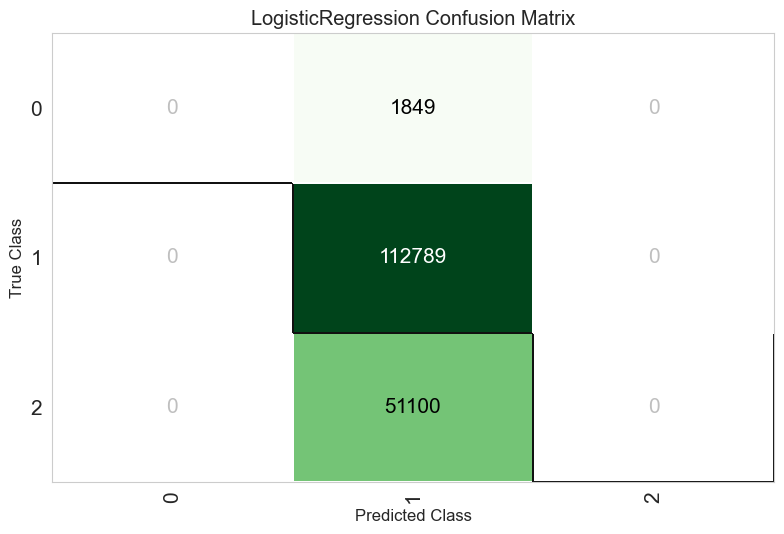

In [313]:
plot_model(best_model, plot = 'confusion_matrix')

In [386]:
predict_model(best_model, crimes_clean_proces.tail())


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,...,PCA50,PCA51,PCA52,PCA53,PCA54,PCA55,PCA56,Primary Type,prediction_label,prediction_score
552453,1,0,0,0,0,0,0,0,0,0,...,-0.021145,-0.075268,0.528680,0.275678,-0.406928,0.390573,-0.155316,1,Property crimes,0.6049
552454,0,0,0,0,0,0,0,0,0,0,...,0.002162,-0.004939,-0.034658,-0.014111,-0.049180,0.031643,0.011938,1,Property crimes,0.7162
552455,1,0,0,0,0,0,0,0,0,0,...,0.000351,-0.002758,-0.004809,-0.006338,-0.002526,0.004249,-0.000589,1,Property crimes,0.6912
552456,0,0,0,0,0,0,0,0,0,0,...,0.004412,0.001126,-0.021528,-0.018076,-0.002753,-0.053394,0.013606,1,Property crimes,0.7182
552457,0,0,0,0,0,0,0,0,0,0,...,-0.019217,-0.075872,0.535433,0.263209,-0.409586,0.389240,-0.145112,1,Property crimes,0.6638


In [388]:
y_pred = model.predict(X_test)


,Community Area_Albany Park,Community Area_Archer Heights,Community Area_Armour Square,Community Area_Ashburn,Community Area_Auburn Gresham,Community Area_Austin,Community Area_Avalon Park,Community Area_Avondale,Community Area_Belmont Cragin,Community Area_Beverly,...,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Holiday_False,Holiday_True,Previous Holiday_False,Previous Holiday_True
424627,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
412392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
77054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
418799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
259178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
365838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
131932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [359]:
from sklearn.linear_model import LogisticRegression
X = crimes_clean_proces.drop('Primary Type', axis=1)
y = crimes_clean_proces['Primary Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


In [389]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)




Precisión del modelo: 0.6805439911185124


In [363]:
# Generar un informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de clasificación:\n", report)

Informe de clasificación:
                   precision    recall  f1-score   support

Extreme violence       0.00      0.00      0.00      1811
 Property crimes       0.68      0.99      0.81    112776
  Violent crimes       0.49      0.02      0.04     51151

        accuracy                           0.68    165738
       macro avg       0.39      0.34      0.28    165738
    weighted avg       0.62      0.68      0.56    165738



In [362]:

# Crear una matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)

Matriz de confusión:
 [[     0   1758     53]
 [     0 111771   1005]
 [     0  50130   1021]]
